<a href="https://colab.research.google.com/github/Bhargav2301/Projects/blob/main/Resume_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Load and display data
resumeData = pd.read_csv('/content/resume_dataset.csv' ,encoding='utf-8')
resumeData['structured_resume'] = ''

In [5]:
print("Unique categories in resume: ")
print(resumeData['Category'].unique())

Unique categories in resume: 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


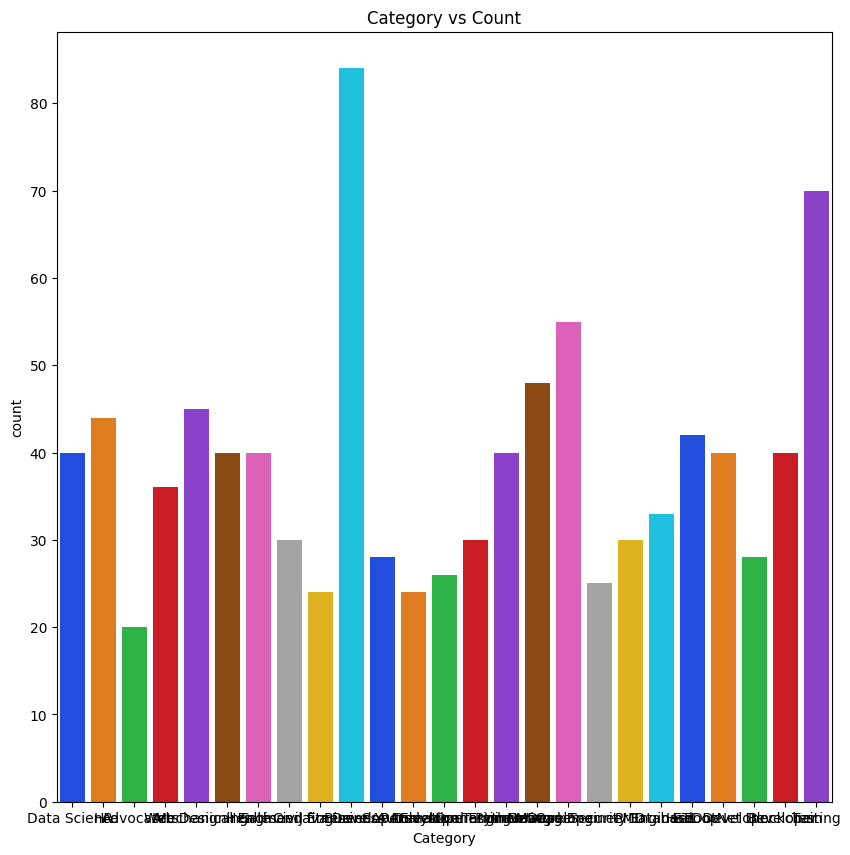

In [6]:
# Visualize the data
plt.figure(figsize=(10,10))
sns.countplot(x="Category", data=resumeData, palette="bright")
plt.title("Category vs Count")
plt.show()


In [8]:
# Data cleaning
def clean_resume(resume_text):
    """Function to clean text data"""
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', resume_text)  # remove punctuations
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub(r'[^\x00-\x7f]',r' ',resume_text)  # remove non-ASCII chars
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return resume_text

In [9]:
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [10]:
# Text processing
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english')+['``',"''"])
total_words = []
sentences = resumeData['Resume'].values
cleaned_sentences = ""
for i in range(0,160):
    cleaned_text = clean_resume(sentences[i])
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stopwords_set and word not in string.punctuation:
            total_words.append(word)

wordfrequencydist = nltk.FreqDist(total_words)
most_common = wordfrequencydist.most_common(50)
print(most_common)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


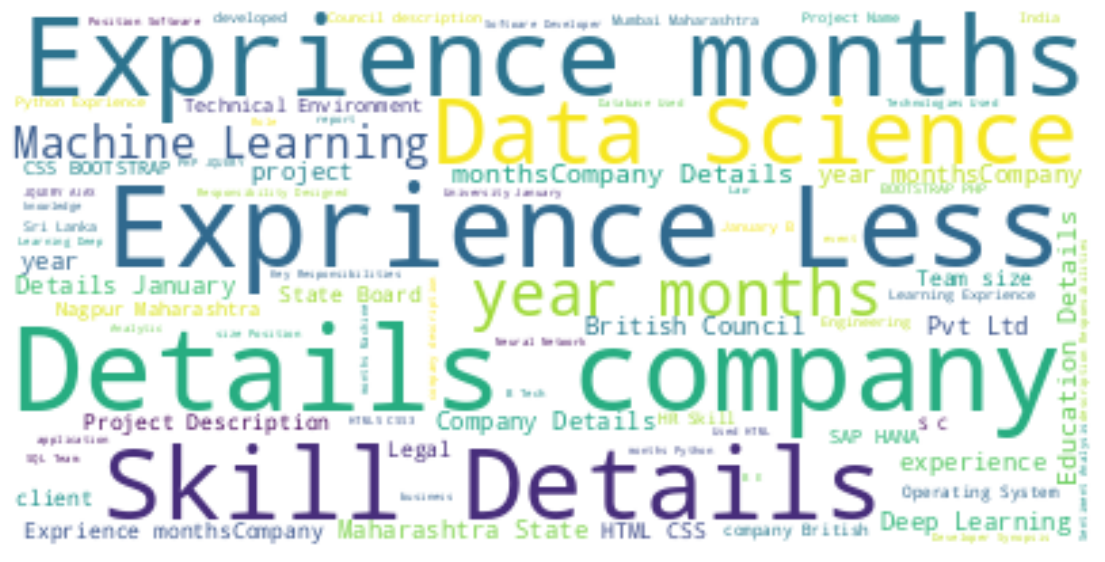

In [11]:
# Word cloud visualization
word_cloud = WordCloud(background_color="white").generate(cleaned_sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [12]:

# Feature extraction and modeling
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])

required_text = resumeData['structured_resume'].values
required_target = resumeData['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
word_vectorizer.fit(required_text)
word_features = word_vectorizer.transform(required_text)


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(word_features, required_target, random_state=0, test_size=0.2)


In [14]:
# Model training and evaluation
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))
print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    